# 1 Predicting Gender of Brazilian Names Using Machine Learning in Data Lattes

## 1.1 Necessary libraries

In [42]:
import pandas as pd
from joblib import dump, load
from unidecode import unidecode
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append(r"../machine-learning-models/")

In [3]:
import SVM.SVM as SVM

## 1.2 Machine Learning Model

In [9]:
svc = SVM.SVM(path=r"../machine-learning-models/SVM/Models/")

## 1.3 Read the dataset

In [4]:
DataLattes = pd.read_csv(r"..\web-scraping-from-lattes\dataLattes.csv")

In [5]:
DataLattes.head()

,Unnamed: 0,primeiro_nome,nome_completo,formacao,titulo,ano
0,0,Jussiê,Jussiê Soares da Rocha,doutorado,Numerical Techniques For Future Applications ...,2018
1,1,Álvaro,Álvaro Itaúna Schalcher Pereira,doutorado,Estudo de caso dos colaboradores da Unidade d...,2018
2,2,Álvaro,Álvaro Itaúna Schalcher Pereira,doutorado,Determinação da porosidade drenável em amostr...,2018
3,3,Álvaro,Álvaro Itaúna Schalcher Pereira,doutorado,Evaluation of conservational practices of the...,2018
4,4,Álvaro,Álvaro Itaúna Schalcher Pereira,doutorado,Solos de Textura Arenosa e Argilosa,2018


In [6]:
DataLattes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455794 entries, 0 to 455793
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     455794 non-null  int64 
 1   primeiro_nome  455794 non-null  object
 2   nome_completo  455794 non-null  object
 3   formacao       455794 non-null  object
 4   titulo         455794 non-null  object
 5   ano            455794 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 20.9+ MB


In [7]:
print("Doutorado : " + str(sum(DataLattes["formacao"]=="doutorado")))
print("Mestado : " + str(sum(DataLattes["formacao"]=="mestrado")))

Doutorado : 391000
Mestado : 64794


### 1.2.1 Preparing the data

In [25]:
namesDout = DataLattes[DataLattes["formacao"]=="doutorado"]['primeiro_nome'].apply(lambda x: unidecode(str(x)).lower().replace("-", " "))
namesMest = DataLattes[DataLattes["formacao"]=="mestrado"]['primeiro_nome'].apply(lambda x: unidecode(str(x)).lower().replace("-", " "))

## 1.3 Predict Gender

### 1.3.1 Data of master's degree

In [26]:
resultMest = svc.classify(namesMest)

In [43]:
dump(resultMest, r"./results/SVM_Mestrado.hdf5")

['./results/SVM_Mestrado.hdf5']

#### 1.3.1.1 Analysis of results - Master's

In [32]:
print("M : " + str(resultMest.count("M")))
print("F : " + str(resultMest.count("F")))

M : 34536
F : 30258


In [38]:
dftmp = pd.DataFrame(columns=["M","F"])
dftmp["F"] = [resultMest.count("F")]
dftmp["M"] = [resultMest.count("M")]

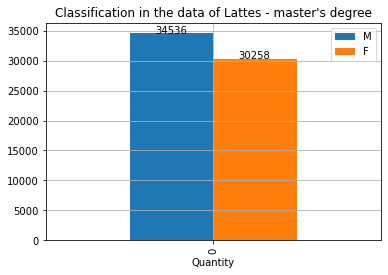

In [39]:
ax = dftmp.plot(kind="bar")
plt.title("Classification in the data of Lattes - master's degree")
plt.grid('True')
plt.xlabel('Quantity')
x_offset = -0.05
y_offset = 2.5
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

### 1.3.2 Data of doctorate degree

In [31]:
resultDout = svc.classify(namesDout)

In [44]:
dump(resultDout, r"./results/SVM_Doutorado.hdf5")

['./results/SVM_Doutorado.hdf5']

#### 1.3.1.1 Analysis of results - Doctorate

In [35]:
print("M : " + str(resultDout.count("M")))
print("F : " + str(resultDout.count("F")))

M : 217871
F : 173129


In [40]:
dftmp = pd.DataFrame(columns=["M","F"])
dftmp["F"] = [resultDout.count("F")]
dftmp["M"] = [resultDout.count("M")]

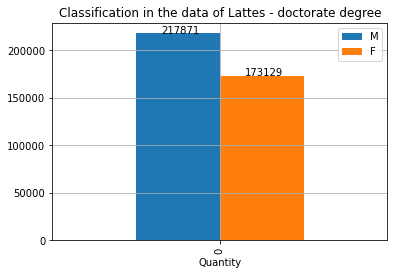

In [45]:
ax = dftmp.plot(kind="bar")
plt.title("Classification in the data of Lattes - doctorate degree")
plt.grid('True')
plt.xlabel('Quantity')
x_offset = -0.05
y_offset = 2.5
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))